In [6]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from subSelectImages import subSelectImages
from segmentImages import segmentImages
from diffusers import StableDiffusionInpaintPipeline

def load_sd_inpaint_model():
    """Loads Stable Diffusion Inpainting model."""
    print(" Loading Stable Diffusion Inpainting model...")
    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-inpainting",
        torch_dtype=torch.float16
    ).to("cuda" if torch.cuda.is_available() else "cpu")
    print(" Model loaded successfully.")
    return pipe

def substituteSquirrels():
    selected_images = subSelectImages()
    print(f" Selected original images: {selected_images}")

    mask_files = [img_path.rsplit(".", 1)[0] + "_mask.png" for img_path in selected_images]
    print(f" Using pre-generated masks: {mask_files}")

    assert all(os.path.exists(mask) for mask in mask_files), " One or more mask files are missing!"

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    pipe = load_sd_inpaint_model()

    squirrel_images = []

    for img_path, mask_path in zip(selected_images, mask_files):
        print(f" Processing {img_path}...")

        image = Image.open(img_path).convert("RGB").resize((512, 512))
        mask = Image.open(mask_path).convert("L").resize((512, 512))

        text_prompts = [
            "A squirrel eating at a bird feeder, photorealistic, detailed fur, natural outdoor background",
            "A chipmunk sitting where the bird was, eating seeds at the feeder, realistic lighting",
            "A small squirrel holding a seed at the feeder, in a natural setting, ultra-detailed"
        ]

        inpainted_image = pipe(
            prompt=text_prompts,
            image=image,
            mask_image=mask,
            num_inference_steps=50,
        ).images[0]

        save_path = img_path.replace(".jpeg", "-NowWithSquirrels.jpg")
        inpainted_image.save(save_path)
        squirrel_images.append(save_path)
        print(f" Saved: {save_path}")

    return squirrel_images

# Example usage
if __name__ == "__main__":
    squirrel_images = substituteSquirrels()
    print(" Birds replaced with squirrels successfully!")
    print(" Final Saved Images:", squirrel_images)


Device set to use cuda:0


 Selected Images: ['images/origIm14.jpeg', 'images/origIm2.jpeg', 'images/origIm3.jpeg', 'images/origIm5.jpeg', 'images/origIm6.jpeg']
 Selected original images: ['images/origIm14.jpeg', 'images/origIm2.jpeg', 'images/origIm3.jpeg', 'images/origIm5.jpeg', 'images/origIm6.jpeg']
 Using pre-generated masks: ['images/origIm14_mask.png', 'images/origIm2_mask.png', 'images/origIm3_mask.png', 'images/origIm5_mask.png', 'images/origIm6_mask.png']
 Loading Stable Diffusion Inpainting model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

 Model loaded successfully.
 Processing images/origIm14.jpeg...


  0%|          | 0/50 [00:00<?, ?it/s]

 Saved: images/origIm14-NowWithSquirrels.jpg
 Processing images/origIm2.jpeg...


  0%|          | 0/50 [00:00<?, ?it/s]

 Saved: images/origIm2-NowWithSquirrels.jpg
 Processing images/origIm3.jpeg...


  0%|          | 0/50 [00:00<?, ?it/s]

 Saved: images/origIm3-NowWithSquirrels.jpg
 Processing images/origIm5.jpeg...


  0%|          | 0/50 [00:00<?, ?it/s]

 Saved: images/origIm5-NowWithSquirrels.jpg
 Processing images/origIm6.jpeg...


  0%|          | 0/50 [00:00<?, ?it/s]

 Saved: images/origIm6-NowWithSquirrels.jpg
 Birds replaced with squirrels successfully!
 Final Saved Images: ['images/origIm14-NowWithSquirrels.jpg', 'images/origIm2-NowWithSquirrels.jpg', 'images/origIm3-NowWithSquirrels.jpg', 'images/origIm5-NowWithSquirrels.jpg', 'images/origIm6-NowWithSquirrels.jpg']


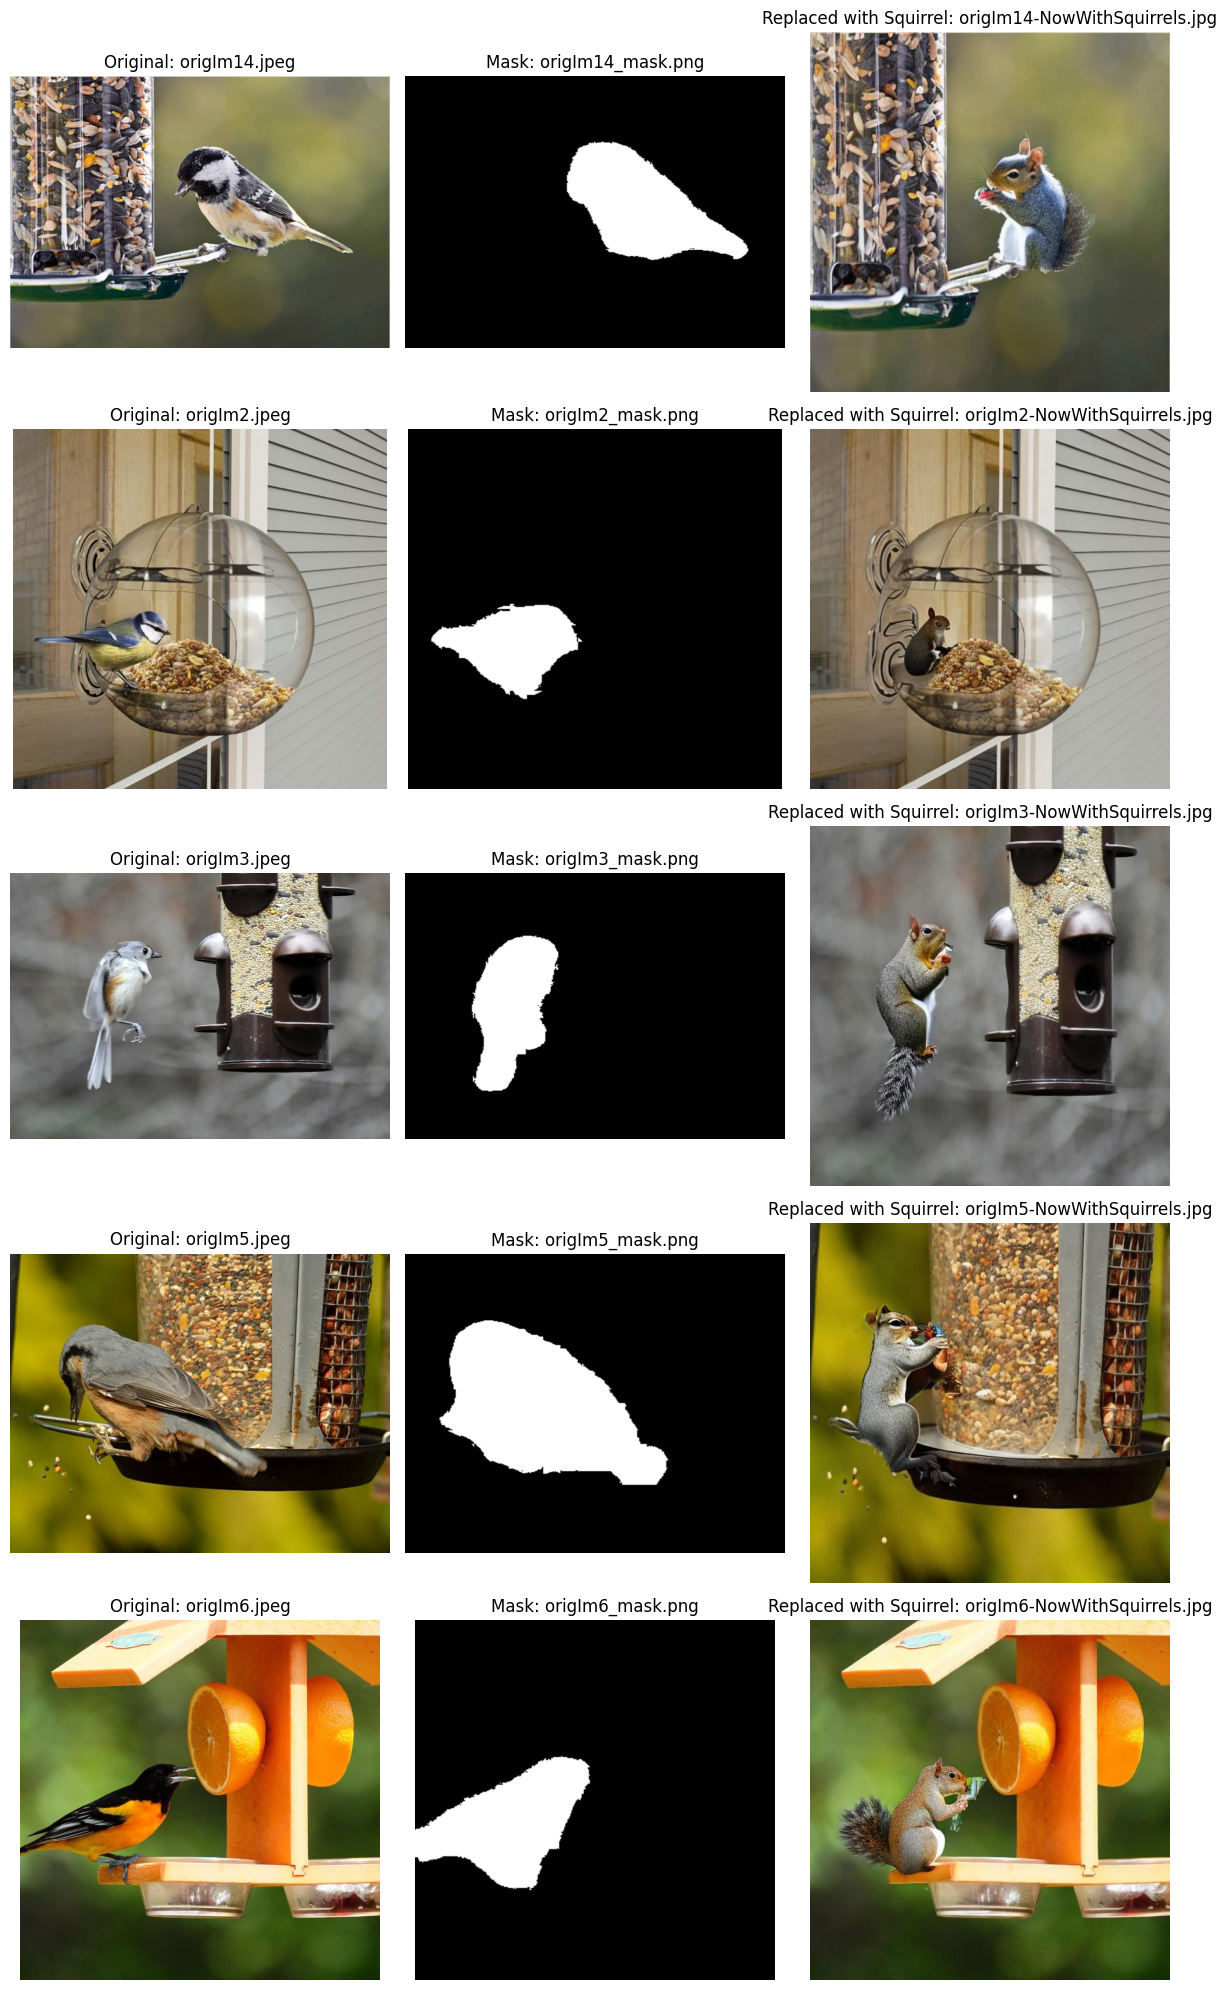

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define image paths
image_dir = "images"
squirrel_images = [
    "origIm14-NowWithSquirrels.jpg",
    "origIm2-NowWithSquirrels.jpg",
    "origIm3-NowWithSquirrels.jpg",
    "origIm5-NowWithSquirrels.jpg",
    "origIm6-NowWithSquirrels.jpg"
]

# Prepare figure
fig, axes = plt.subplots(len(squirrel_images), 3, figsize=(12, len(squirrel_images) * 4))

for i, squirrel_img in enumerate(squirrel_images):
    # Get corresponding original and mask images
    original_img = squirrel_img.replace("-NowWithSquirrels.jpg", ".jpeg")
    mask_img = squirrel_img.replace("-NowWithSquirrels.jpg", "_mask.png")

    # Load images
    original = Image.open(os.path.join(image_dir, original_img))
    mask = Image.open(os.path.join(image_dir, mask_img))
    squirrel = Image.open(os.path.join(image_dir, squirrel_img))

    # Plot images
    axes[i, 0].imshow(original)
    axes[i, 0].set_title(f"Original: {original_img}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(mask, cmap="gray")
    axes[i, 1].set_title(f"Mask: {mask_img}")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(squirrel)
    axes[i, 2].set_title(f"Replaced with Squirrel: {squirrel_img}")
    axes[i, 2].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()
